<a href="https://colab.research.google.com/github/IamTutor/git101/blob/main/project_rerun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Introduction to the problem

2.Analytic objective

3.Data description and preparation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

In [3]:
stock = pd.read_csv('AAPL.csv')
stock_clean = stock.dropna()
stock_clean

,Date,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
0,2005-10-17,6.66,6.69,6.50,6.60,154208600,0.169237,6.827473,6.150527,6.67,...,33.692,33.9970,34.2690,1190.10,1186.57,1187.33,10348.10,10287.34,10238.76,6.45
1,2005-10-18,6.57,6.66,6.44,6.45,152397000,0.168339,6.819677,6.146323,6.60,...,33.570,33.9525,34.2466,1178.14,1190.10,1184.87,10285.26,10348.10,10253.17,6.78
2,2005-10-19,6.43,6.78,6.32,6.78,252170800,0.180306,6.861112,6.139888,6.45,...,33.562,33.9600,34.2330,1195.76,1178.14,1177.68,10414.13,10285.26,10216.91,6.93
3,2005-10-20,6.72,6.97,6.71,6.93,339440500,0.202674,6.931847,6.121153,6.78,...,33.567,33.9455,34.2190,1177.80,1195.76,1176.84,10281.10,10414.13,10216.59,6.87
4,2005-10-21,7.02,7.03,6.83,6.87,199181500,0.216680,6.974860,6.108140,6.93,...,33.586,33.9365,34.2034,1179.59,1177.80,1186.57,10215.22,10281.10,10287.34,7.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,2011-08-10,45.82,46.25,44.75,44.90,219664200,1.758433,50.659865,43.626135,46.17,...,49.937,51.5830,51.2236,1120.76,1172.53,1260.34,10719.94,11239.77,11896.44,46.13
1465,2011-08-11,45.74,46.35,45.02,46.13,185492300,1.634255,50.509509,43.972491,44.90,...,49.475,51.4020,51.1534,1172.64,1120.76,1200.07,11143.31,10719.94,11383.68,46.54
1466,2011-08-12,46.67,46.87,46.20,46.54,132244000,1.561458,50.438417,44.192583,46.13,...,49.072,51.2075,51.0894,1178.81,1172.64,1199.38,11269.02,11143.31,11444.61,47.33
1467,2011-08-15,46.86,47.52,46.67,47.33,115136000,1.537207,50.448914,44.300086,46.54,...,48.765,51.0630,51.0554,1204.49,1178.81,1119.46,11482.90,11269.02,10809.85,46.97


4.Data exploration and visualization

<ipython-input-4-bcb47d8c6007>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  stock_clean.corr()
<ipython-input-4-bcb47d8c6007>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(stock_clean.corr(), cmap = 'RdYlBu', vmin = -1, vmax = 1)


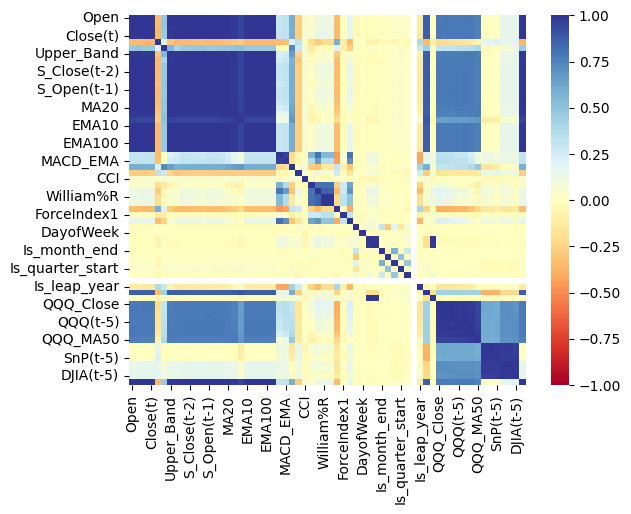

In [4]:
stock_clean.corr()
sns.heatmap(stock_clean.corr(), cmap = 'RdYlBu', vmin = -1, vmax = 1)
plt.show()

5.Model explanation

6.Modeling implementation

In [5]:
model = ols('Open ~ Upper_Band*EMA10',stock_clean).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Open   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.458e+05
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        15:40:18   Log-Likelihood:                -487.76
No. Observations:                1469   AIC:                             983.5
Df Residuals:                    1465   BIC:                             1005.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0014      0.040     -0.033      0.973      -0.081       0.078
Upper_Band          -0.1069      0.007    -15.047      0.000      -0.121      -0.093
EMA10                1.1222      0.008    141.991      0.000       1.107       1.138
Upper_Band:EMA10    -0.0002    7.2e-05     -2.571      0.010      -0.000   -4.39e-05
==============================================================================
Omnibus:                      230.843   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3477.525
Skew:                           0.148   Prob(JB):                         0.00
Kurtosis:                      10.532   Cond. No.                     3.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
res = model.predict(stock_clean)
res

0        6.581475
1        6.554789
2        6.655261
3        6.773626
4        6.830564
          ...    
1464    45.422052
1465    45.604709
1466    45.875214
1467    46.341925
1468    46.520019
Length: 1469, dtype: float64

<Axes: >

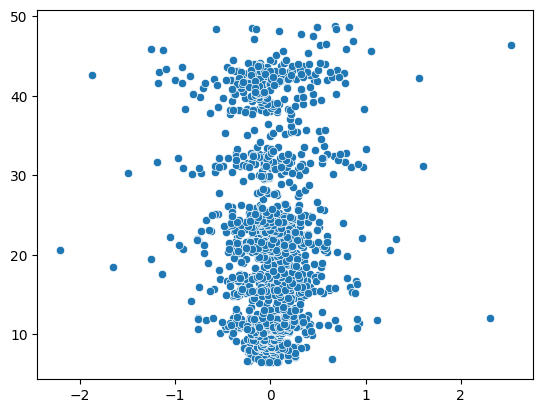

In [7]:
sns.scatterplot(x =model.resid, y = res)